**This notebook demonstrates a controlled Hadamard gate**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

Barenco's [paper](http://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457?cm_mc_uid=43781767191014577577895&cm_mc_sid_50200000=1460741020) can be used to compute the controlled-V operation if there exists $A, B, C$ such that $ABC = I$ and $V = e^{i\alpha} AZBZC$.

Note: I cannot reconcile the method in Barenco's paper with the method described in the IBM User Guide and implemented below (even though multiplication of the matrices shown in the IBM User Guide yields the correct matrix).

In [1]:
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools

# Get a backend
IBMQ.load_accounts()
simulator = backend_tools.get_device(use_sim=True, min_qubits=2)

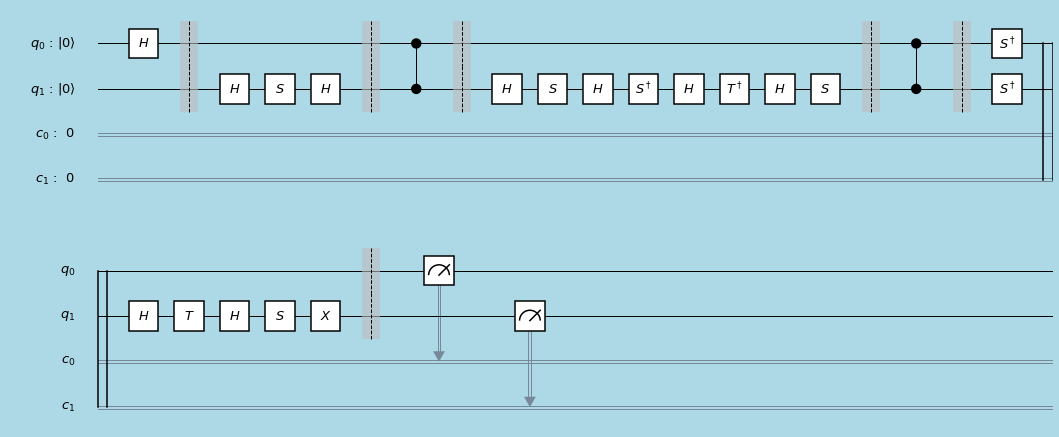

In [4]:
# Define the quantum circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

# Create the initial state |0+> (IBM notation)
circuit.h(q[0])

# Controlled Hadamard
circuit.barrier()
# C term
circuit.h(q[1])
circuit.s(q[1])
circuit.h(q[1])

circuit.barrier()
circuit.cz(q[0], q[1])
circuit.barrier()

# B term
circuit.h(q[1])
circuit.s(q[1])
circuit.h(q[1])
circuit.sdg(q[1])
circuit.h(q[1])
circuit.tdg(q[1])
circuit.h(q[1])
circuit.s(q[1])

circuit.barrier()
circuit.cz(q[0], q[1])
circuit.barrier()

# A term
circuit.sdg(q[1])
circuit.h(q[1])
circuit.t(q[1])
circuit.h(q[1])
circuit.s(q[1])
circuit.x(q[1])
# Apply [[1,0], [1,-i]] to the first qubit
circuit.sdg(q[0])

circuit.barrier()

# Finish off with the measurement along the z-axis
circuit.measure(q, c)

# Draw the circuit
style = {'backgroundcolor': 'lightblue'}
circuit.draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7)

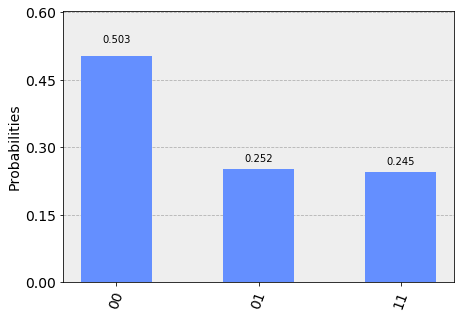

In [5]:
# Simulate or run the circuit
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)